In [26]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [27]:
clusters=3
iterations=20

In [28]:
data=pd.read_csv("iris_plant.csv")
col=data.columns
feat=data.iloc[:,:-1]
feat_matx=feat.values
random.seed(3)
initial_index=random.sample(list(range(feat_matx.shape[0])),clusters)
gnd_truth=data.values[:,-1]

[60, 139, 33]

In [29]:
cent=data.iloc[initial_index,:-1].values
cl_list=[-1 for i in range(feat_matx.shape[0])]

In [30]:
def cluster_making(feat_matx,cent,cl_list,clusters):
    d=[]
    for i in range(clusters):
        d.append(((feat_matx-cent[i])**2).sum(axis=1))
    d=np.array(d)
    x=d.argmin(axis=0)
    for i in range(feat_matx.shape[0]):
        cl_list[i]=(x[i])


In [31]:
def cent_changing(feat_matx,cent,cl_list):
    l,count=np.unique(cl_list,return_counts=True)
    for i in range(len(l)):
        f=np.array([0,0,0,0])
        for j in range(len(cl_list)):
            if cl_list[j]==l[i]:
                f=f+feat_matx[j]
        cent[i]=(f/count[i])


In [32]:
for i in range(iterations):
    cluster_making(feat_matx,cent,cl_list,clusters)
    cent_changing(feat_matx,cent,cl_list) 

In [33]:
color=['red','black','blue']
color_list=[]
uniq=np.unique(cl_list)
for i in uniq:
    for j in cl_list:
        if i==j:
            color_list.append(color[i])    

Text(0, 0.5, 'petal_width')

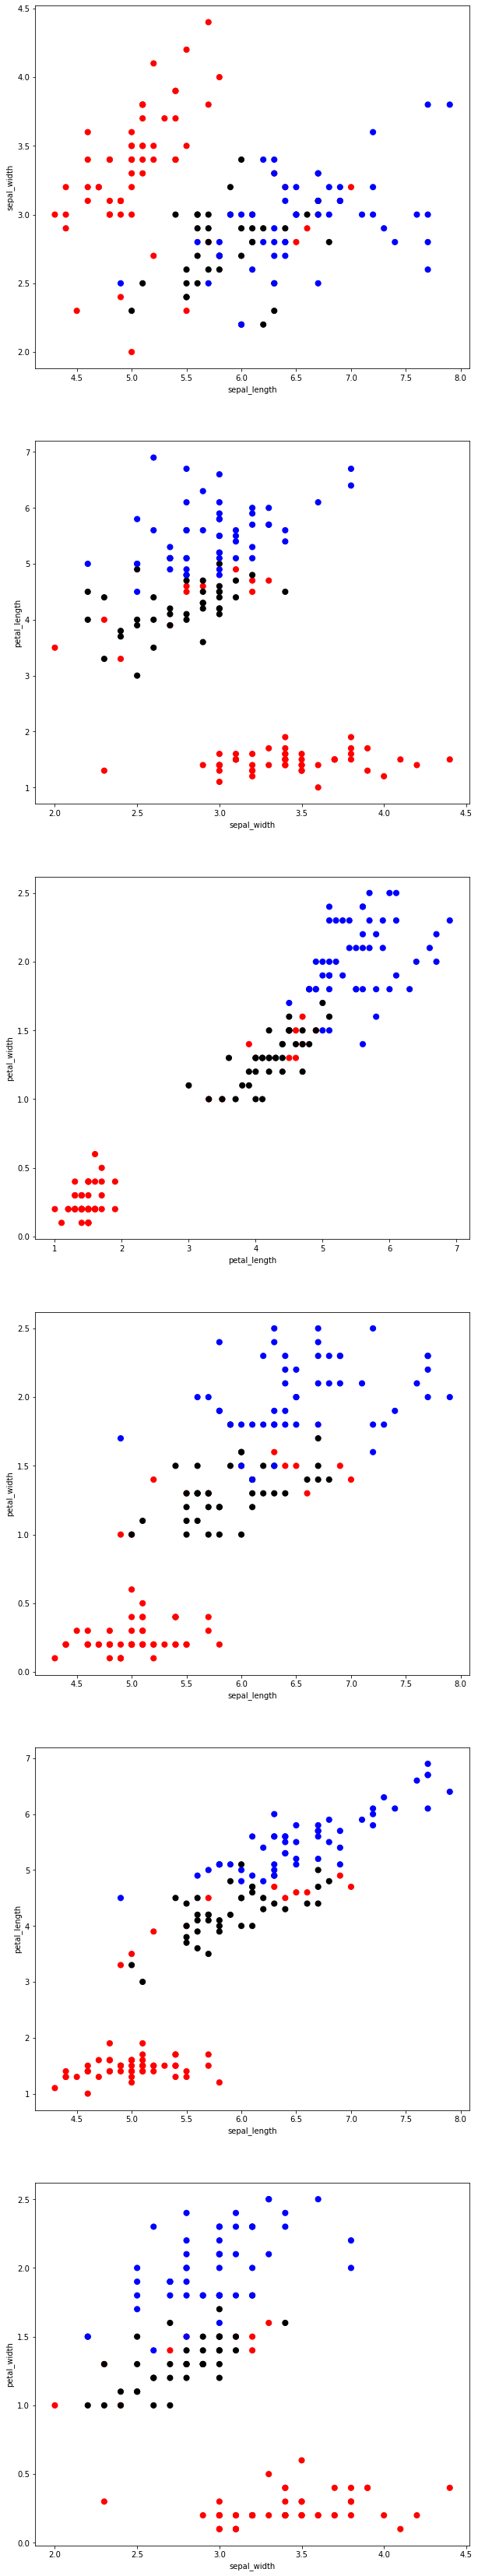

In [34]:
fig,axes=plt.subplots(figsize=(10,60),nrows=6,ncols=1)
axes[0].scatter(feat_matx[:,0],feat_matx[:,1],s=50,c=color_list)
axes[0].set_xlabel(col[0])
axes[0].set_ylabel(col[1])
axes[1].scatter(feat_matx[:,1],feat_matx[:,2],s=50,c=color_list)
axes[1].set_xlabel(col[1])
axes[1].set_ylabel(col[2])
axes[2].scatter(feat_matx[:,2],feat_matx[:,3],s=50,c=color_list)
axes[2].set_xlabel(col[2])
axes[2].set_ylabel(col[3])
axes[3].scatter(feat_matx[:,0],feat_matx[:,3],s=50,c=color_list)
axes[3].set_xlabel(col[0])
axes[3].set_ylabel(col[3])
axes[4].scatter(feat_matx[:,0],feat_matx[:,2],s=50,c=color_list)
axes[4].set_xlabel(col[0])
axes[4].set_ylabel(col[2])
axes[5].scatter(feat_matx[:,1],feat_matx[:,3],s=50,c=color_list)
axes[5].set_xlabel(col[1])
axes[5].set_ylabel(col[3])

In [35]:
cent   

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

In [36]:
def jacc_dist(gnd_truth,cl_list):
    gnd_label=[]
    for i in range(len(np.unique(gnd_truth))):
        l=[]
        for j in range(len(gnd_truth)):
            if gnd_truth[j]==(np.unique(gnd_truth))[i]:
                l.append(j)
        gnd_label.append(l)
    cluster_label=[]
    for i in range(len(np.unique(cl_list))):
        l=[]
        for j in range(len(cl_list)):
            if cl_list[j]==(np.unique(cl_list))[i]:
                l.append(j)
        cluster_label.append(l)
    d=[]
    for i in range(len(np.unique(gnd_truth))):
        l=[]
        for j in range(len(np.unique(cl_list))):
            a=set(cluster_label[j])
            b=set(gnd_label[i])
            p=1-(len(a.intersection(b))/len(a.union(b)))
            l.append(p)
        d.append(l)
    return d

In [37]:
dist=jacc_dist(gnd_truth,cl_list)
dist

[[1.0, 1.0, 0.0],
 [0.265625, 0.9651162790697675, 1.0],
 [0.8556701030927836, 0.3207547169811321, 1.0]]